In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
#importing the ther necessary libraries:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Loading Dataset
zdata =pd.read_csv ("../input/zomato-bangalore-restaurants/zomato.csv")
zdata.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zdata.shape

(51717, 17)

# Columns Description

1. URL- url of the restaurant on the Zomato website

2. address- address of the restaurant

3. name- name of the restaurant

4. online_order- column having binary values(yes/no) whether or not online ordering is available in the restaurant

5. book_table- column having binary values(yes/no) whether or not we can book tables(reservation) in the restaurant 

6. rate- the overall rating of the restaurant out of 5

7. votes- the total number of rating for the restaurant

8. phone- phone number of the restaurant

9. location- neighbourhood in which the restaurant is located

10. rest_type- restaurant type

11. dish_liked- dishes people liked in the restaurant 

12. cuisines- food styles (separated by comma)

13. approx_cost(for two people)- the approximate cost for a meal for two people

14. reviews_list- list of tuples containing reviews for the restaurant

15. menu_item- list of menus available in the restaurant

16. listed_in(type)- type of meal

17. listed_in(city)- neighbourhood in which the restaurant is listed

# Number of Rows and Atrributes:

Before data cleaning:
* No.of rows= 51717
* No. of attributes= 17

In [5]:
zdata.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 51717 entries, 0 to 51716

Data columns (total 17 columns):

 #   Column                       Non-Null Count  Dtype 

---  ------                       --------------  ----- 

 0   url                          51717 non-null  object

 1   address                      51717 non-null  object

 2   name                         51717 non-null  object

 3   online_order                 51717 non-null  object

 4   book_table                   51717 non-null  object

 5   rate                         43942 non-null  object

 6   votes                        51717 non-null  int64 

 7   phone                        50509 non-null  object

 8   location                     51696 non-null  object

 9   rest_type                    51490 non-null  object

 10  dish_liked                   23639 non-null  object

 11  cuisines                     51672 non-null  object

 12  approx_cost(for two people)  51371 non-null  object

 13  reviews_list 

There are many columns that have Null values and there are some columns that are not required for our analysis. In the next step we will focus on cleaning the dataset to implement the exploratory data analysis.

# DATA PREPARATION AND CLEANING:

Columns like dish_liked, url, and phone are not required. Hence we will drop these columns.
Columns with NaN values  and duplicates are also dropped.

In [6]:
zdata=zdata.drop(['phone','dish_liked','menu_item'],axis=1)
zdata.dropna(how='any',inplace=True)

#number of duplicate values
zdata.duplicated().sum()
zdata.drop_duplicates(inplace=True)

Certain column names are changed for the ease of understanding the dataset.

The values in rate column will be converted in to floating point value. We will remove the '/5' and convert their type.

Cost value is converted into float.

In [7]:
#Changing the column names
zdata= zdata.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Removing '/5' from Rates
zdata = zdata.loc[zdata.rate !='NEW']
zdata = zdata.loc[zdata.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zdata.rate = zdata.rate.apply(remove_slash).str.strip().astype('float')

#Changing the cost to floating point 
zdata['cost'] = zdata['cost'].astype(str) 
zdata['cost'] = zdata['cost'].apply(lambda x: x.replace(',','.'))
zdata['cost'] = zdata['cost'].astype(float)

The data has been cleaned.

**Checking for Null Values:**

In [8]:
#Checking for null values:
zdata.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64

We see that there are no null values in the dataset now.

# After Cleaning the Data Set

In [9]:
zdata.shape

(41263, 14)

In [10]:
zdata.head()
zdata.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 41263 entries, 0 to 41262

Data columns (total 14 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   url           41263 non-null  object 

 1   address       41263 non-null  object 

 2   name          41263 non-null  object 

 3   online_order  41263 non-null  object 

 4   book_table    41263 non-null  object 

 5   rate          41263 non-null  float64

 6   votes         41263 non-null  int64  

 7   location      41263 non-null  object 

 8   rest_type     41263 non-null  object 

 9   cuisines      41263 non-null  object 

 10  cost          41263 non-null  float64

 11  reviews_list  41263 non-null  object 

 12  type          41263 non-null  object 

 13  city          41263 non-null  object 

dtypes: float64(2), int64(1), object(11)

memory usage: 4.4+ MB


**Number of Rows and Atrributes:**

After data cleaning:
* No.of rows= 41263
* No. of attributes= 14

# EXPLORATORY DATA ANALYSIS
This dataset contains reviews of restaurants in Bangalore from Zomato.

**1. Most Famous Restaurant Chains in Bangalore**

A chain restaurant is a group of restaurants with many different locations that share a name and concept. We first find the top 10 restaurant chains. The ordering is done based on the number of franchises a restaurant has. We assume that the more the number of franchises the more popular it is.

From the bar plot below we see that Cafe Coffee Day has the most number of franchises in Bangalore.


Text(0.5, 0, 'Number of outlets')

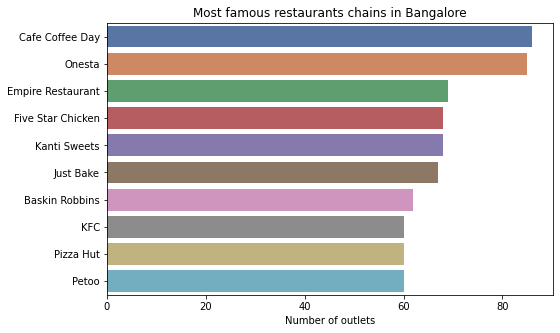

In [15]:
plt.figure(figsize=(8,5))
chains=zdata['name'].value_counts()[:10]
#print(chains)
sb.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")

**2. Types of Restaurants in Bangalore**

Text(0.5, 1.0, 'Types of Restaurant')

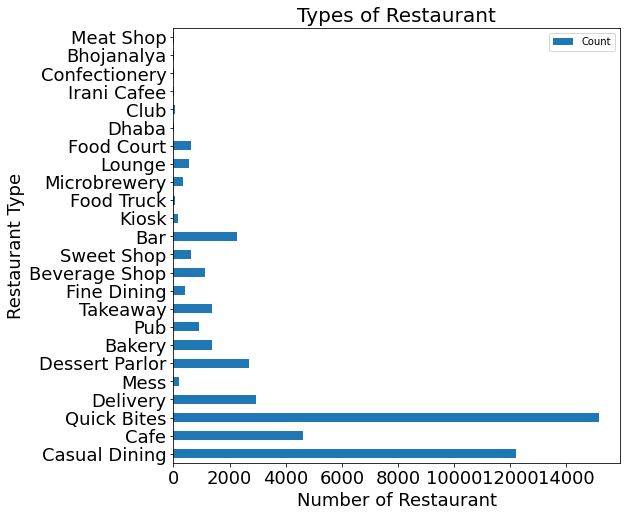

In [35]:
rTypes=[]
rCount=[]
for t in zdata['rest_type']:
    t1=t.split(', ')
    for i in t1:
        if i not in rTypes:
            rTypes.append(i)
            rCount.append(1)
        else:
            index=rTypes.index(i)
            rCount[index]+=1
df = pd.DataFrame({'Restaurant Type': rTypes, 'Count': rCount})
ax = df.plot.barh(x='Restaurant Type', y='Count',figsize=(8,8), fontsize=18)
ax.set_xlabel("Number of Restaurant",fontsize=18) 
ax.set_ylabel("Restaurant Type",fontsize=18)
ax.set_title("Types of Restaurant", fontsize=20)

**3.Distribution of Restaurant Rating**

From the following,we can see that on average the restaurants in our dataset has a rating between 3.5 and 4.0. There are very few restaurants with a rating of less than 3.0.

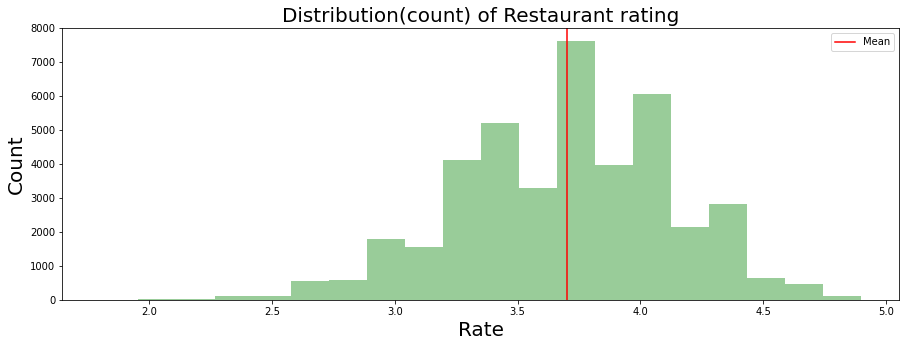

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sb.distplot(zdata.rate,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(zdata.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

**4. Top Favourite Cuisines**

In [20]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]



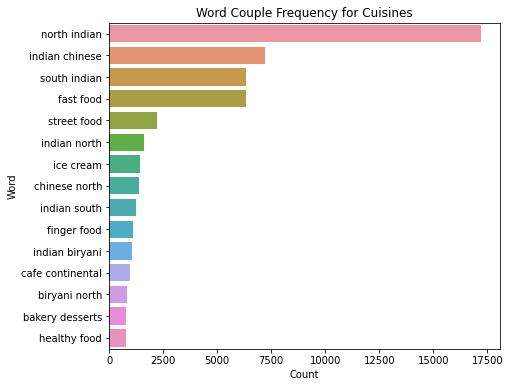

In [21]:
lst = get_top_words(zdata['cuisines'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sb.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

**5. Mean Rating of Each Restaurant**

In [22]:
restaurants = list(zdata['name'].unique())
zdata['Mean Rating'] = 0
for i in range(len(restaurants)):
    zdata['Mean Rating'][zdata['name'] == restaurants[i]] = zdata['rate'][zdata['name'] == restaurants[i]].mean()   
#Scaling the mean rating values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zdata[['Mean Rating']] = scaler.fit_transform(zdata[['Mean Rating']]).round(2)
zdata[['name','rate','Mean Rating']].head()

,name,rate,Mean Rating
0,Jalsa,4.1,3.99
1,Spice Elephant,4.1,3.97
2,San Churro Cafe,3.8,3.58
3,Addhuri Udupi Bhojana,3.7,3.45
4,Grand Village,3.8,3.58
